# Introduction

<img src="https://i.imgur.com/iemn4xo.jpg" width="400px">

"M5 Forecasting - Accuracy" competition에 오신 걸 환영합니다! 이 competition에선, 참가자들이 캘리포니아, 텍사스, 위스콘신 주에서의 계층적인 판매를 기반으로 웖마트에서 미래 판매를 예측하는 것입니다. 판매, 수익, 재고 가격을 예측하는 것이 경제학에서 고전적인 머신러닝을 적용하는 것입니다, 그리고 이 것은 투자자들이 알고리즘으로 만들어진 예측에 기반한 결정을 하는데 도움을 주기 때문에 중요합니다.

이 커널에서, 저는 데이터셋의 구조를 간략히 소개할 것입니다. 그리고 나서, 저는 Matploylib과 Plotly를 사용하여 데이터셋을 시각화할 것입니다. 그리고 마지막으로, 저는 어떻게 이 문제가 예측 알고리즘의 다양성에 접근될 수 있는 지 증명할 것입니다.

<font size=3 color="red">만약 이 커널이 마음에 든다면, 투표해주세요. 제가 더 좋은 퀄리티의 콘텐츠를 만드는 데 도움이 됩니다. :)</font>

<!--
Welcome to the "M5 Forecasting - Accuracy" competition! In this competition, contestants are challenged to forecast future sales at Walmart based on heirarchical sales in the states of California, Texas, and Wisconsin. Forecasting sales, revenue, and stock prices is a classic application of machine learning in economics, and it is important because it allows investors to make guided decisions based on forecasts made by algorithms. 

In this kernel, I will briefly explain the structure of dataset. Then, I will visualize the dataset using Matplotlib and Plotly. And finally, I will demonstrate how this problem can be approached with a variety of forecasting algorithms.

<font size=3 color="red">Please upvote this kernel if you like it. It motivates me to produce more quality content :)</font>
-->

시작하기 전에, 시계열을 예측하는 법에 대한 훌륭한 비디오가 있습니다.

<!--
To get started, here is an excellent video about how to approach time series forecasting:
-->

In [3]:
from IPython.display import HTML
HTML('<center><iframe width="700" height="400" src="https://www.youtube.com/embed/bn8rVBuIcFg?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>')

# Acknowledgements

1. [M5 Forecasting - Starter Data Exploration](https://www.kaggle.com/robikscube/m5-forecasting-starter-data-exploration) ~ by Rob Mulla
2. [EDA and Baseline Model](https://www.kaggle.com/rdizzl3/eda-and-baseline-model) ~ by RDizzl3
3. [How to Create an ARIMA Model for Time Series Forecasting in Python](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) ~ by Machine Learning Mastery
4. [7 methods to perform Time Series forecasting (with Python codes)](https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/) ~ by Analytics Vidhya
5. [Economics for the IB Diploma](https://www.cambridge.org/core/books/economics-for-the-ib-diploma/1918CF16A8FC979AAB19951A487DCB1C) ~ by Ellie Tragakes
6. [Prophet](https://facebook.github.io/prophet/) ~ by Facebook

# Contents

* [<font size=4>The dataset</font>](#1)


* [<font size=4>EDA</font>](#2)
    * [Preparing the ground](#2.1)
    * [Sales data](#2.2)
    * [Denoising](#2.3)
    * [Stores and sales](#2.4)

    
* [<font size=4>Modeling</font>](#3)
    * [Train/Val split](#3.1)
    * [Naive approach](#3.2)
    * [Moving average](#3.3)
    * [Holt linear](#3.4)
    * [Exponential smoothing](#3.5)
    * [ARIMA](#3.6)
    * [Prophet](#3.7)
    * [Loss for each model](#3.8)


* [<font size=4>Takeaways</font>](#4)


* [<font size=4>Ending Note</font>](#5)

# The dataset <a id="1"></a>

데이터셋은 5개의 .csv 파일로 구성됩니다.

* <code>calendar.csv</code> - 어떤 상품이 판매되었는 지에 대한 날짜를 포함합니다. 날짜는 <code>yyyy/dd/mm</code> 형식으로 되어있습니다.

* <code>sales_train_validation.csv</code> - 상품 별로 매일 기록된 개당 판매 정보를 포함합니다. 그리고 <code>[d_1 - d_1913]</code> 로 저장합니다.

* <code>submission.csv</code> - competition에서 제출을 위한 올바른 포맷을 보여줍니다.

* <code>sell_prices.csv</code> - 상점과 날짜마다 판매된 상품의 가격에 대한 정보를 포함합니다.

* <code>sales_train_evaluation.csv</code> - competition 마감 전에 한달 동안 이용가능합니다. <code>[d_1 - d_1941]</code>에 대한 판매를 포함할 것입니다.

이 competition에서 저희는 <code>[d_1942 - d_1969]</code>에 대한 판매를 예측해야 합니다. 행들은 evaluation set으로 구성됩니다. 행 <code>[d_1914 - d_1941]</code> 는 validation set이고, 나머지 행들은 training set으로 구성됩니다. 이제 데이터셋을 이해하고, 무엇을 예측할 지 알아보고, 데이터셋을 시각화합시다.

<!--
The dataset consists of five .csv files.

* <code>calendar.csv</code> - Contains the dates on which products are sold. The dates are in a <code>yyyy/dd/mm</code> format.

* <code>sales_train_validation.csv</code> - Contains the historical daily unit sales data per product and store <code>[d_1 - d_1913]</code>.

* <code>submission.csv</code> - Demonstrates the correct format for submission to the competition.

* <code>sell_prices.csv</code> - Contains information about the price of the products sold per store and date.

* <code>sales_train_evaluation.csv</code> - Available one month before the competition deadline. It will include sales for <code>[d_1 - d_1941]</code>.

In this competition, we need to forecast the sales for <code>[d_1942 - d_1969]</code>. These rows form the evaluation set. The rows <code>[d_1914 - d_1941]</code> form the validation set, and the remaining rows form the training set. Now, since we understand the dataset and know what to predict, let us visualize the dataset.
-->

# EDA <a id="2"></a>

이제, 판매 데이터들을 시각화하고 데이터에서 몇몇의 insight를 얻어보겠습니다.

<!--
Now, I will try to visualize the sales data and gain some insights from it.
-->

## Preparing the ground <a id="2.1"></a>

### Import libraries

In [4]:
import os
import gc
import time
import math
import datetime
from math import log, floor
from sklearn.neighbors import KDTree

import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.utils import shuffle
from tqdm.notebook import tqdm as tqdm

import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import pywt
from statsmodels.robust import mad

import scipy
import statsmodels
from scipy import signal
import statsmodels.api as sm
from fbprophet import Prophet
from scipy.signal import butter, deconvolve
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [5]:
INPUT_DIR = '../input/m5-forecasting-accuracy'
calendar = pd.read_csv(f'{INPUT_DIR}/calendar.csv')
selling_prices = pd.read_csv(f'{INPUT_DIR}/sell_prices.csv')
sample_submission = pd.read_csv(f'{INPUT_DIR}/sample_submission.csv')
sales_train_val = pd.read_csv(f'{INPUT_DIR}/sales_train_validation.csv')

## Sales data <a id="2.2"></a>


### Sample sales data

In [6]:
ids = sorted(list(set(sales_train_val['id'])))
d_cols = [c for c in sales_train_val.columns if 'd_' in c]
x_1 = sales_train_val.loc[sales_train_val['id'] == ids[2]].set_index('id')[d_cols].values[0]
x_2 = sales_train_val.loc[sales_train_val['id'] == ids[1]].set_index('id')[d_cols].values[0]
x_3 = sales_train_val.loc[sales_train_val['id'] == ids[17]].set_index('id')[d_cols].values[0]

fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_1)), y=x_1, showlegend=False,
                    mode='lines', name="First sample",
                         marker=dict(color="mediumseagreen")),
             row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_2)), y=x_2, showlegend=False,
                    mode='lines', name="Second sample",
                         marker=dict(color="violet")),
             row=2, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_3)), y=x_3, showlegend=False,
                    mode='lines', name="Third sample",
                         marker=dict(color="dodgerblue")),
             row=3, col=1)

fig.update_layout(height=1200, width=800, title_text="Sample sales")
fig.show()

데이터셋에서 임의로 선택된 상점에서의 판매 데이터들이 있습니다. 예상처럼, 정해진 날의 판매에 영향을 미치는 매우 많은 요소들이 있다는 사실이 있기 때문에, 판매 데이터는 매우 오류가 많습니다. 특정한 날마다, 판매량이 0이 되는데 그것은 그 날에 특정 상품을 이용할 수 없다는 것을 나타냅니다. (Rob의 커널에서 기록된 것 처럼)

<!--
These are sales data from randomly selected stores in the dataset. As expected, the sales data is very erratic, owing to the fact that so many factors affect the sales on a given day. On certain days, the sales quantity is zero, which indicates that a certain product may not be available on that day (as noted by Rob in his kernel).
-->

### Sample sales snippets

In [7]:
ids = sorted(list(set(sales_train_val['id'])))
d_cols = [c for c in sales_train_val.columns if 'd_' in c]
x_1 = sales_train_val.loc[sales_train_val['id'] == ids[0]].set_index('id')[d_cols].values[0][:90]
x_2 = sales_train_val.loc[sales_train_val['id'] == ids[4]].set_index('id')[d_cols].values[0][1300:1400]
x_3 = sales_train_val.loc[sales_train_val['id'] == ids[65]].set_index('id')[d_cols].values[0][350:450]
fig = make_subplots(rows=3, cols=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_1)), y=x_1, showlegend=False,
                    mode='lines+markers', name="First sample",
                         marker=dict(color="mediumseagreen")),
             row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_2)), y=x_2, showlegend=False,
                    mode='lines+markers', name="Second sample",
                         marker=dict(color="violet")),
             row=2, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(x_3)), y=x_3, showlegend=False,
                    mode='lines+markers', name="Third sample",
                         marker=dict(color="dodgerblue")),
             row=3, col=1)

fig.update_layout(height=1200, width=800, title_text="Sample sales snippets")
fig.show()

위 그림에서, 저는 단지 판매 데이터에서 작은 정보를 추출하기 위해 확대하였습니다. 시작하기 앞서, 우리는 분명히 판매 데이터가 매우 불규칙적이고 불안정하다는 것을 알 수 있습니다. 때때로, 판매량이 한 행에서 며칠동안 0입니다. 그리고 다른 떄엔, 며칠동안 최고값으로 남아있습니다. 그러므로 우리는 판매 데이터에 근본적인 트렌들을 알고 예측을 하기 위해 일종의 'denoising' 기법이 필요합니다

<!--
In the above plots, I simply zoom in to sample snippets in the sales data. As stated earlier, we can clearly see that the sales data is very erratic and volatile. Sometimes, the sales are zero for a few days in a row, and at other times, it remains at its peak value for a few days. Therefore, we need some sort of "denoising" techniques to find the underlying trends in the sales data and make forecasts.
-->

## Denoising <a id="2.3"></a>
이제, 저는 이 불안정한 판매 가격이 근본적인 트렌드를 추출하기 위해 denoise될 수 있다는 것을 보여줄 것입니다. 이 방법은 원래 시게열에서 일부 정보를 잃을 지도 모릅니다. 그러나 그것은 시계열에서 트렌드를 고려하기 위한 특정 feature를 추출하는데 유용합니다.

<!--
Now, I will show how these volatile sales prices can be denoised in order to extract underlying trends. This method may lose some information from the original time series, but it may be useful in extracting certain features regarding the trends in the time series.
-->

### Wavelet denoising

Wavelet denoising (보통 전기 신호로 사용됨) 은 시계열에서 불필요한 노이즈를 제거하기 위한 방법입니다. 이 방법은 "wavelet cefficients"라 불리는 coefficients를 계산합니다.
이 coefficients는 정보의 어느 부분을 유지할 것인지 (signal) 와 어느 것을 버릴 것인지 (noise) 를 결정합니다. 

우리는 시계열에서 판매에서의 임의성을 이해고 그에 맞춰 wavelet coefficients를 위한 최소 threshold를 결정하기 위해 MAD (mean absolute deviation) 값을 이용합니다.
우리는 wavelets에서 낮은 coefficients 를 걸러내고 남아있는 coefficients에서 판매 데이터를 재구성합니다. 그리고 그것이 우리가 성공적으로 판매 데이터에서 노이즈를 제거한 것입니다.

<!--
Wavelet denoising (usually used with electric signals) is a way to remove the unnecessary noise from a time series. This method calculates coefficients called the "wavelet coefficients". These coefficients decide which pieces of information to keep (signal) and which ones to discard (noise).

We make use of the MAD (mean absolute deviation) value to understand the randomness in the sales and accordingly decide the minimum threshold for the wavelet coefficients in the time series. We filter out the low coefficients from the wavelets and reconstruct the sales data from the remaining coefficients and that's it; we have successfully removed noise from the sales data.
-->

In [8]:
def maddest(d, axis=None):
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def denoise_signal(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * maddest(coeff[-level])

    uthresh = sigma * np.sqrt(2*np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])

    return pywt.waverec(coeff, wavelet, mode='per')

In [9]:
y_w1 = denoise_signal(x_1)
y_w2 = denoise_signal(x_2)
y_w3 = denoise_signal(x_3)


fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_1)), mode='lines+markers', y=x_1, marker=dict(color="mediumaquamarine"), showlegend=False,
               name="Original signal"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_1)), y=y_w1, mode='lines', marker=dict(color="darkgreen"), showlegend=False,
               name="Denoised signal"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_2)), mode='lines+markers', y=x_2, marker=dict(color="thistle"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_2)), y=y_w2, mode='lines', marker=dict(color="purple"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_3)), mode='lines+markers', y=x_3, marker=dict(color="lightskyblue"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_3)), y=y_w3, mode='lines', marker=dict(color="navy"), showlegend=False),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="Original (pale) vs. Denoised (dark) sales")
fig.show()

위 그래프에서, 어두운 선그래프는 denoised된 판매를 나타내고 밝은 선그래프는 원본 판매를 나타냅니다. 우리는 Wavelet denoising이 noise에 의해 흐트러진 것 없이 판매 데이터에서 성공적으로 "general trend"를 찾아낼 수 있다는 것을 알 수 있습니다. 판매에서 이 높은 경향이나 패턴을 발견하는 것은 모델을 트레이닝 하는데 feature을 생성하는데 유용할 지도 모릅니다.

<!--
In the above graphs, the dark lineplots represent the denoised sales and the light lineplots represent the original sales. We can see that Wavelet denoising is able to successfully find the "general trend" in the sales data without getting distracted by the noise. Finding these high- trends or patterns in the sales may be useful in generating features to train a model.
-->

아래 그림은 이 그래프들을 옆으로 보여줍니다. 빨간 그래프는 원본 판매를 나타내고 초록 그래프는 denoised 판매를 나타냅니다.

<!--
The below diagram illustrates these graphs side-by-side. Red graphs represent original sales and green graphs represent denoised sales.
-->

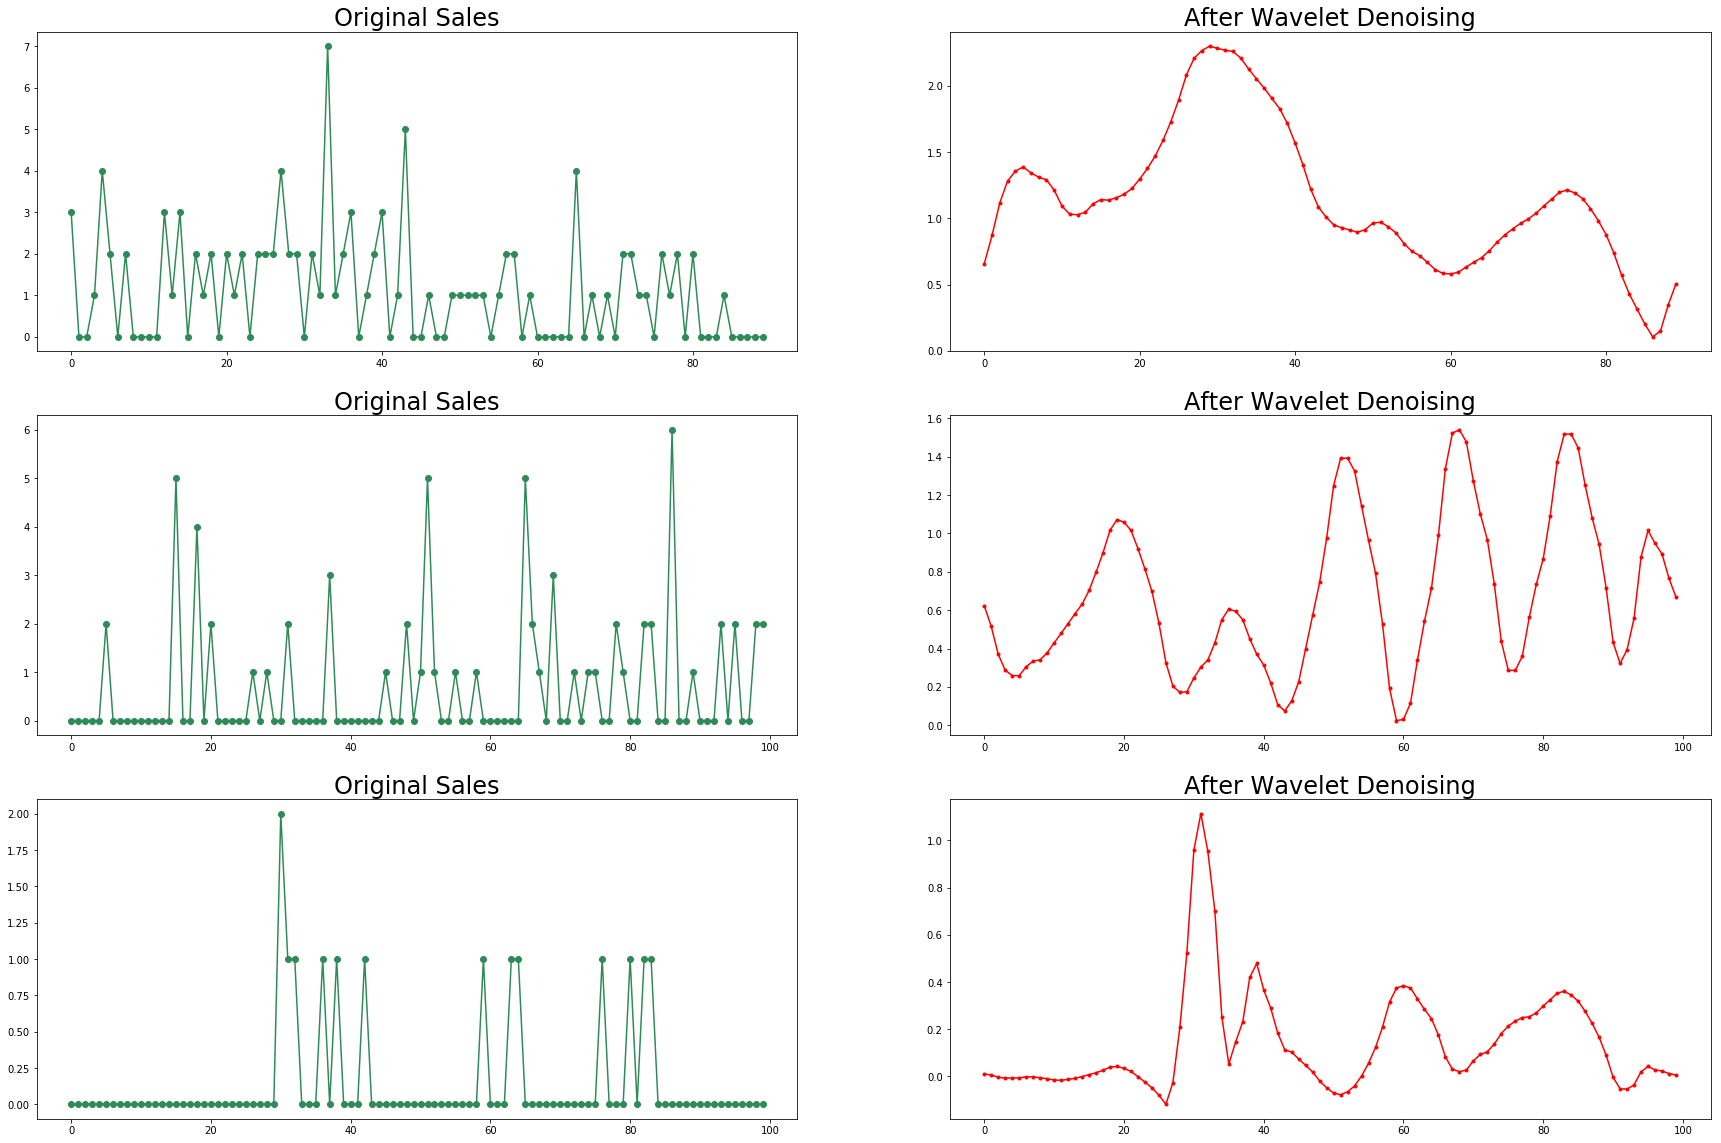

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))

ax[0, 0].plot(x_1, color='seagreen', marker='o') 
ax[0, 0].set_title('Original Sales', fontsize=24)
ax[0, 1].plot(y_w1, color='red', marker='.') 
ax[0, 1].set_title('After Wavelet Denoising', fontsize=24)

ax[1, 0].plot(x_2, color='seagreen', marker='o') 
ax[1, 0].set_title('Original Sales', fontsize=24)
ax[1, 1].plot(y_w2, color='red', marker='.') 
ax[1, 1].set_title('After Wavelet Denoising', fontsize=24)

ax[2, 0].plot(x_3, color='seagreen', marker='o') 
ax[2, 0].set_title('Original Sales', fontsize=24)
ax[2, 1].plot(y_w3, color='red', marker='.') 
ax[2, 1].set_title('After Wavelet Denoising', fontsize=24)

plt.show()

### Average smoothing

Average smooting은 시계열 데이터에서 denoise 하는데 비교적 간단한 방법입니다. 이 방법에서, 우리는 고정된 크기의 (10 처럼) "window"를 가져옵니다. 우리는 먼저 시계열 초반에 window를 놓습니다. (첫 10개의 원소) 그리고 그 부분의 평균을 구합니다. 우리는 이제 특정한 "stride"에 의해 앞쪽으로 시계열을 따라 window를 움직이고, 새 window의 평균을 계산하고, 이 과정을 모든 시계열의 끝까지 도달할 떄까지 반복합니다.  우리가 계산한 모든 평균값은 새로운 시계열로 연관됩니다. 그리고 그것은 denoised 판매 데이터로 구성됩니다.

<!--
Average smooting is a relatively simple way to denoise time series data. In this method, we take a "window" with a fixed size (like 10). We first place the window at the beginning of the time series (first ten elements) and calculate the mean of that section. We now move the window across the time series in the forward direction by a particular "stride", calculate the mean of the new window and repeat the process, until we reach the end of the time series. All the mean values we calculated are then concatenated into a new time series, which forms the denoised sales data.
-->

In [11]:
def average_smoothing(signal, kernel_size=3, stride=1):
    sample = []
    start = 0
    end = kernel_size
    while end <= len(signal):
        start = start + stride
        end = end + stride
        sample.extend(np.ones(end - start)*np.mean(signal[start:end]))
    return np.array(sample)

In [12]:
y_a1 = average_smoothing(x_1)
y_a2 = average_smoothing(x_2)
y_a3 = average_smoothing(x_3)

fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_1)), mode='lines+markers', y=x_1, marker=dict(color="lightskyblue"), showlegend=False,
               name="Original sales"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_1)), y=y_a1, mode='lines', marker=dict(color="navy"), showlegend=False,
               name="Denoised sales"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_2)), mode='lines+markers', y=x_2, marker=dict(color="thistle"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_2)), y=y_a2, mode='lines', marker=dict(color="indigo"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_3)), mode='lines+markers', y=x_3, marker=dict(color="mediumaquamarine"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(x_3)), y=y_a3, mode='lines', marker=dict(color="darkgreen"), showlegend=False),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="Original (pale) vs. Denoised (dark) signals")
fig.show()

위 그래프에서, 어두운 선 그래프는 denoised 판매를 나타내고, 밝은 선 그래프는 원본 판매를 나타냅니다. 우리는 average smoothing이 데이터에서 거시적인 경향이나 패턴을 찾는 데 Wavelet denoising 만큼 효과적이지 않다는 것을 알 수 있습니다. 원본 판매에서 많은 noise는 심지어 denoising 후에도 계속됩니다. 그러므로, wavelet denoising이 판매 데이터에서 트렌드를 찾는 데 분명히 더 효과적입니다. 그럼에도 불구하고, average smoothing이나 "rolling mean"은 모델링에서 유용한 feature를 계산하기 위해 사용됩니다.

<!--
In the above graphs, the dark lineplots represent the denoised sales and the light lineplots represent the original sales. We can see that average smoothing is not as effective as Wavelet denoising at finding macroscopic trends and pattersns in the data. A lot of the noise in the original sales persists even after denoising. Therefore, wavelet denoising is clearly more effective at finding trends in the sales data. Nonetheless, average smoothing or "rolling mean" can also be used to calculate useful features for modeling.
-->

아래 그림은 이 그래프들을 옆으로 보여줍니다. 빨간 그래프는 원본 판매를 보여주고, 초록 그래프는 denoised 판매를 보여줍니다.

<!--
The below diagram illustrates these graphs side-by-side. Red graphs represent original sales and green graphs represent denoised sales.
-->

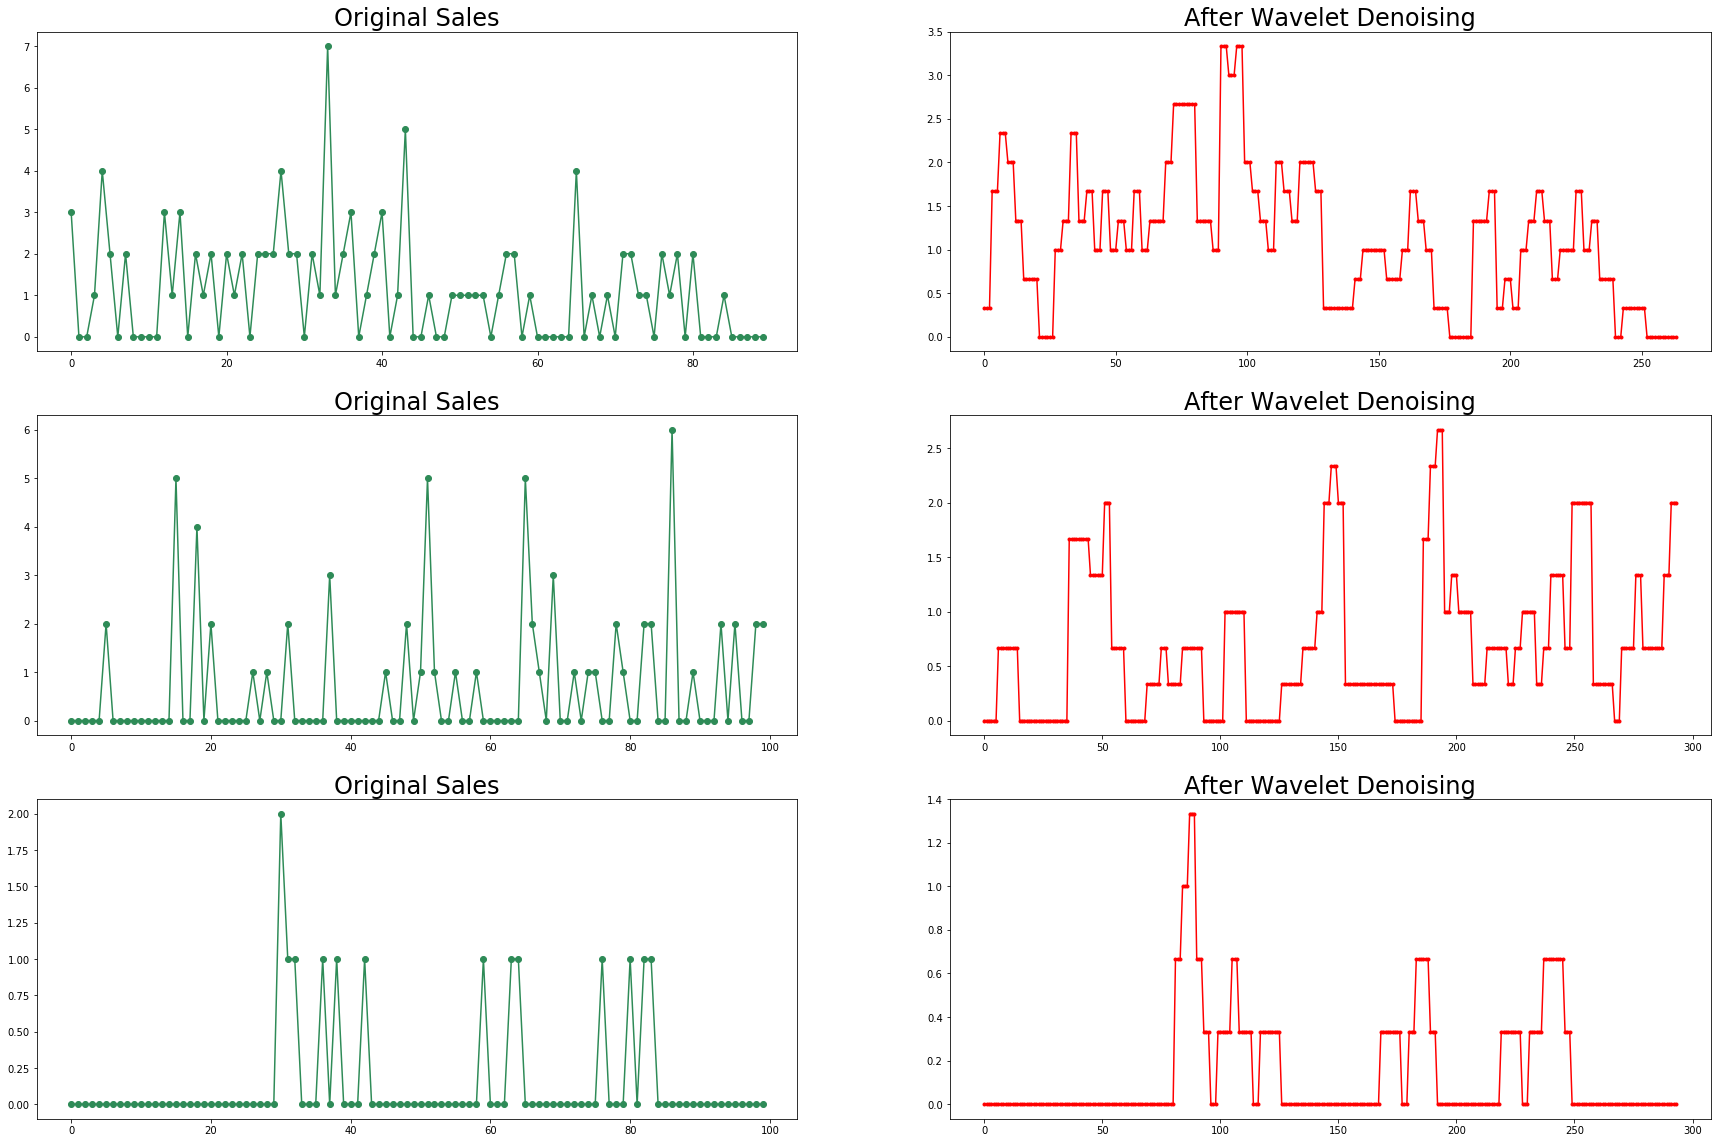

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))

ax[0, 0].plot(x_1, color='seagreen', marker='o') 
ax[0, 0].set_title('Original Sales', fontsize=24)
ax[0, 1].plot(y_a1, color='red', marker='.') 
ax[0, 1].set_title('After Wavelet Denoising', fontsize=24)

ax[1, 0].plot(x_2, color='seagreen', marker='o') 
ax[1, 0].set_title('Original Sales', fontsize=24)
ax[1, 1].plot(y_a2, color='red', marker='.') 
ax[1, 1].set_title('After Wavelet Denoising', fontsize=24)

ax[2, 0].plot(x_3, color='seagreen', marker='o') 
ax[2, 0].set_title('Original Sales', fontsize=24)
ax[2, 1].plot(y_a3, color='red', marker='.') 
ax[2, 1].set_title('After Wavelet Denoising', fontsize=24)

plt.show()

## Stores and states <a id="2.4"></a>
이제 저는 몇몇의 유용한 통찰을 얻기 위해 다른 상점과 주 쪽으로 판매 데이터를 볼 것입니다.

<!--
Now, I will look at the sales data across different stores and states in order to gain some useful insights.
-->

### Rolling Average Price vs. Time for each store

In [14]:
past_sales = sales_train_val.set_index('id')[d_cols] \
    .T \
    .merge(calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')

store_list = selling_prices['store_id'].unique()
means = []
fig = go.Figure()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    data = past_sales[store_items].sum(axis=1).rolling(90).mean()
    means.append(np.mean(past_sales[store_items].sum(axis=1)))
    fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (per store)")

위 그래프에서, 저는 데이터셋의 모든 상점을 따라 rolling sales 를 표시했습니다. 거의 모든 판매 곡선은 거시적인 레벨에선 "linear oscillation" 경향을 가지고 있습니다. 기본적으로, 판매량은 특정 평균 값에 대해 사인 곡선처럼 진동한다. 그러나 이것은 위쪽으로 선형 추세를 가지고 있다. 이것은 판매량이 몇달마다 점점 더 커지는 레벨에서 진동한다는 것을 내포한다.

이것은 **business cycle**을 연상시킨다. 그것은 경제학이 짧은 기간의 진동하는 변동을 가지고 있으나 긴 범위에서는 선형적으로 증가한다는 것 나타낸다. 아마도, 상점 레벨에서 그런 작은 규모의 경향이 거시적인 레벨에서 본 경향을 결정하기 위해 올라간다. 아래는 거시적인 비지니스 사이클의 그림이다.

<!--
In the above graph, I have plotted rolling sales across all stores in the dataset. Almost every sales curve has "linear oscillation" trend at the macroscopic level. Basically, the sales oscillate like a sine wave about a certain mean value, but this mean value has an upward linear trend. This implies that the sales are oscillating at a higher and higher level every few months.

This trend is reminiscent of the **business cycle**, where economies have short-term oscillatory fluctuations but grow linearly in the long run. Maybe, such small-scale trends at the level of stores add up to decide trends we see at the macroeconomic level. Below is an illustration of the macroeconomic business cycle:
-->

<img src="https://i.imgur.com/YB551eX.png" width="600px"> 

In [15]:
fig = go.Figure()

for i, s in enumerate(store_list):
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        fig.add_trace(go.Box(x=[s]*len(data), y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Store name ")

위 그래프는 데이터셋에서 각 상정에 대한 판매 분포를 비교한다. 캘리포니아의 상점은 판매에서 가장 높은 분산을 가진 것처럼 보인다. 그리고 그것은 캘리포니아에서의 일부 장소가 다른 곳보다 상당히 빠르게 성장한다는 것을 가리킬 지도 모른다. *예)* 개발 불균형이 있다. 반면에, 위즈코신과 텍사스는 많은 분산이 없이 꽤 안정적으로 보인다. 이것은 개발이 주 안에서 더 동일할 것이라는 것을 의미한다. 게다가, 캘리포니아 상점은 또한 가장 높은 전체 평균 판매를 가진 것 같다.

<!--
The above plot compares the sales distribution for each store in the dataset. The stores in California seem to have the highest variance in sales, which might indicate that some places in California grow significantly faster than others, *i.e.* there is development disparity. On the other hand, the Wisconsin and Texas sales seem to be quite consistent among themselves, without much variance. This indicates that development might be more uniform in these states. Moreover, the California stores also seem to have the highest overall mean sales.
-->

In [16]:
df = pd.DataFrame(np.transpose([means, store_list]))
df.columns = ["Mean sales", "Store name"]
px.bar(df, y="Mean sales", x="Store name", color="Store name", title="Mean sales vs. Store name")

위 그래프에서, 우리는 같은 트렌드를 볼 수 있다: 캘리포니아 상점은 데이터셋에서 모든 상점 중에서 가장 높은 분산과 평균 판매를 가지고 있다.

<!--
From the above graph, we can see the same trends: California stores have the highest variance and mean sales among all the stores in the dataset.
-->

### Rolling Average Price vs. Time (CA)

In [17]:
greens = ["mediumaquamarine", "mediumseagreen", "seagreen", "green"]
store_list = selling_prices['store_id'].unique()
fig = go.Figure()
means = []
stores = []
for i, s in enumerate(store_list):
    if "ca" in s or "CA" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        means.append(np.mean(past_sales[store_items].sum(axis=1)))
        stores.append(s)
        fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s, marker=dict(color=greens[i])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (California)")

위 그래프에서, 우리는 캘리포니아 상점 중 판매량에서 가장 큰 차이를 볼 수 있다. 이 판매 곡선은 거의 서로 겹치지 않는다. 이것은 시간에 따라 변하지 않는 캘리포니아의 개발 중 특정한 "hubs"가 있다는 것을 가리킬 지도 모른다. 그리고 다른 지역들은 항상 "hubs" 뒤에 남겨져 있다. 감소하는 순서로 평균 판매량은 <code>CA_3, CA_1, CA_2, CA_4</code> 이다. 상점 <code>CA_3</code>은 최대 판매량이고 반면에 상점 <code>CA_4</code> 는 최소 판매량이다.

<!--
In the above graph, we can see the large disparity in sales among California stores. The sales curves almost never intersect each other. This may indicate that there are certain "hubs" of development in California which do not change over time. And other areas always remain behind these "hubs". The average sales in descending order are <code>CA_3, CA_1, CA_2, CA_4</code>. The store <code>CA_3</code> has maximum sales while the store <code>CA_4</code> has minimum sales. 
-->

In [18]:
fig = go.Figure()

for i, s in enumerate(store_list):
    if "ca" in s or "CA" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        fig.add_trace(go.Box(x=[s]*len(data), y=data, name=s, marker=dict(color=greens[i])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Store name (California)")

In [19]:
df = pd.DataFrame(np.transpose([means, stores]))
df.columns = ["Mean sales", "Store name"]
px.bar(df, y="Mean sales", x="Store name", color="Store name", title="Mean sales vs. Store name", color_continuous_scale=greens)


fig = go.Figure(data=[
    go.Bar(name='', x=stores, y=means, marker={'color' : greens})])

fig.update_layout(title="Mean sales vs. Store name (California)", yaxis=dict(title="Mean sales"), xaxis=dict(title="Store name"))
fig.update_layout(barmode='group')
fig.show()

위 그래프에서, 우리는 같은 관계를 알 수 있다. 상점 <code>CA_3</code>는 최대 판매량을 가지고 있고 상점 <code>CA_4</code> 최소 판매량을 가지고 있다.

<!--
In the above plots, we can see the same relationship. The store <code>CA_3</code> has maximum sales while the store <code>CA_4</code> has minimum sales.
-->

### Rolling Average Price vs. Time (WI)

In [20]:
purples = ["thistle", "violet", "purple", "indigo"]
store_list = selling_prices['store_id'].unique()
fig = go.Figure()
means = []
stores = []
for i, s in enumerate(store_list):
    if "wi" in s or "WI" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        means.append(np.mean(past_sales[store_items].sum(axis=1)))
        stores.append(s)
        fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s, marker=dict(color=purples[i%len(purples)])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (Wisconsin)")

위 그래프에서, 우리는 워싱턴 상점 중에서 매우 낮은 차이를 볼 수 있다. 판매 곡선은 매우 자주 서로 겹친다. 이것은 위스코신의 대부분이 비슷한 "development curve" 갖고 있고, 주를 건너면서 개발에서는 더 대단한 공평함이 있다는 것을 가리키는 것 같다. 개발에서 구체적인 "hotspots" 이나 "hubs"가 없다. 감소하는 순서로 평균 판매는 <code>WI_2, WI_3, WI_1</code> 이다. 상점 <code>WI_2</code>는 최대 판매를 가지고 있고, 반면에 상점 <code>WI_2</code>는 최대 판매를 가지고 있고 반면에 <code>WI_1</code> 최소 판매를 가지고 있다.

<!--
In the above graph, we can see a very low disparity in sales among Wisconsin stores. The sales curves intersect each other very often. This may indicate that most parts of Wisconsin have a similar "development curve" and that there is a greater equity in development across the state. There are no specific "hotspots" or "hubs" of development. The average sales in descending order are <code>WI_2, WI_3, WI_1</code>. The store <code>WI_2</code> has maximum sales while the store <code>WI_1</code> has minimum sales. 
-->

In [21]:
fig = go.Figure()

for i, s in enumerate(store_list):
    if "wi" in s or "WI" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        fig.add_trace(go.Box(x=[s]*len(data), y=data, name=s, marker=dict(color=purples[i%len(purples)])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Store name (Wisconsin)")

In [22]:
df = pd.DataFrame(np.transpose([means, stores]))
df.columns = ["Mean sales", "Store name"]
px.bar(df, y="Mean sales", x="Store name", color="Store name", title="Mean sales vs. Store name", color_continuous_scale=greens)


fig = go.Figure(data=[
    go.Bar(name='', x=stores, y=means, marker={'color' : purples})])

fig.update_layout(title="Mean sales vs. Store name (Wisconsin)", yaxis=dict(title="Mean sales"), xaxis=dict(title="Store name"))
fig.update_layout(barmode='group')
fig.show()

위 그래프에서, 우리는 같은 관계를 알 수 있다. 상점 <code>W1_2</code> 최대 판매이고 반면에, 상점 <code>W1_1</code> 최소 판매이다.

<!--
In the above plots, we can see the same relationship. The store <code>W1_2</code> has maximum sales while the store <code>W1_1</code> has minimum sales. 
-->

### Rolling Average Price vs. Time (TX)

In [23]:
blues = ["skyblue", "dodgerblue", "darkblue"]
store_list = selling_prices['store_id'].unique()
fig = go.Figure()
means = []
stores = []
for i, s in enumerate(store_list):
    if "tx" in s or "TX" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        means.append(np.mean(past_sales[store_items].sum(axis=1)))
        stores.append(s)
        fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s, marker=dict(color=blues[i%len(blues)])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Time (Texas)")

위 그래프에서, 우리는 텍사스 상점 중에서 판매 차이가 가장 낮은 것을 다시 한 번  볼 수 있다. 판매 커브는 종종 서로 겹친다, 비록 위스콘신 처럼 자주는 아니지만. 이것은 텍사스의 대부분의 지역과 비슷한 "development curve"를 가지고 있고 주를 넘어서 개발에 더 동등함이 있다는 것을 다시 한 번 가리킨다. 분산은 위스콘신 보다 더 높다 그러나 텍사스에서의 개발 "hubs" 일 지도 모른다. 캘리포니아에서 만큼 표현되지 않을 지 모른다. 감소하는 순서의 평균 판매는 <code>TX_2, TX_3, TX_1</code> 이다. 상점 <code>TX_2</code>는 최대 판매를 가지고 있고, 상점 <code>TX_1</code>는 최소 판매를 가지고 있다.

<!--
In the above graph, we can once again see that a very low disparity in sales among Texas stores. The sales curves intersect each other often, albeit not as often as in Wisconsin. This might once again indicate that most parts of Texas have a similar "development curve" and that there is a greater equity in development across the state. The variance here is higher than in Wisconsin though, so there might be "hubs" of development in Texas as well, but not as pronounced as in California. The average sales in descending order are <code>TX_2, TX_3, TX_1</code>. The store <code>TX_2</code> has maximum sales while the store <code>TX_1</code> has minimum sales.
-->

In [24]:
fig = go.Figure()

for i, s in enumerate(store_list):
    if "tx" in s or "TX" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        fig.add_trace(go.Box(x=[s]*len(data), y=data, name=s, marker=dict(color=blues[i%len(blues)])))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Rolling Average Sales vs. Store name (Texas)")

In [25]:
df = pd.DataFrame(np.transpose([means, stores]))
df.columns = ["Mean sales", "Store name"]
px.bar(df, y="Mean sales", x="Store name", color="Store name", title="Mean sales vs. Store name", color_continuous_scale=greens)


fig = go.Figure(data=[
    go.Bar(name='', x=stores, y=means, marker={'color' : blues})])

fig.update_layout(title="Mean sales vs. Store name (Texas)", yaxis=dict(title="Mean sales"), xaxis=dict(title="Store name"))
fig.update_layout(barmode='group')
fig.show()

위 그래프에서, 우리는 같은 관계를 알 수 있다. 상점 <code>TX_2</code> 최대 판매를 가지고 있고, 반면에 상점 <code>TX_1</code> 최소 판매를 가지고 있다.

<!--
In the above plots, we can see the same relationship. The store <code>TX_2</code> has maximum sales while the store <code>TX_1</code> has minimum sales. 
-->

# Modeling <a id="3"></a>

이제 저는 어떻게 판매가 다양한 방법을 사용해서 예측될 수 있는 지 증명할 것입니다, 다시 말해서: **naive approach, moving average, Holt linear, exponetial smoothing, ARIMA, and Prophet**

<!--
Now, I will demonstrate how sales can be forecasted using various methods, namely: **naive approach, moving average, Holt linear, exponential smoothing, ARIMA, and Prophet**
-->

## Train/Val split <a id="3.1"></a>

먼저, 우리는 모델을 훈련하고 검증하기 위해 작은 트레이닝과 셋을 만들 필요가 있다. 저는 유효 데이터로 마지막 30일의 판매를 사용할 것이고, 그 전의 70일의 판매를 트레이닝 데이터로 사용할 것입니다. 우리는 훈련 데이터에서 판매량을 사용하여 유효 데이터에서 판매를 예측할 필요가 있다.

<!--
First, we need to create miniature training and validation sets to train and validate our models. I will use the last 30 days' sales as the validation data and the sales of the 70 days before that as the training data. We need to predict the sales in the validation data using the sales in the training data.
-->

In [26]:
train_dataset = sales_train_val[d_cols[-100:-30]]
val_dataset = sales_train_val[d_cols[-30:]]

아래는 세 개의 샘플 데이터 부분에서의 판매량입니다. 저는 모델의 작동을 확인하기 위해 이 샘플들을 사용할 것 입니다.

<!--
Below are the sales from three sample data points. I will use these samples to demonstrate the working of the models.
-->

In [27]:
fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[0].values, marker=dict(color="dodgerblue"), showlegend=False,
               name="Original signal"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[0].values, mode='lines', marker=dict(color="darkorange"), showlegend=False,
               name="Denoised signal"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[1].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[1].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[2].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[2].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="Train (blue) vs. Validation (orange) sales")
fig.show()

## Naive approach <a id="3.2"></a>

첫 접근은 매우 간단한 **naive approach** 입니다. 이것은 단지 현재 판매로 다음 판매를 예측하는 것입니다. 모델은 다음으로 요약할 수 있습니다.:

<!--
The first approach is the very simple **naive approach**. It simply forecasts the next day's sales as the current day's sales. The model can be summarized as follows:
-->

<img src="https://i.imgur.com/r8wjrzk.png" width="110px">

위 식에서 *y<sub>t+1</sub>* 는 다음 날의 판매량을 위한 예측 값입니다. 그리고 *y<sub>t</sub>* 는 오늘의 판매량입니다. 모델은 오늘 판매량으로 내일 판매량을 예측합니다. 지금 우리가 어떻게 이 샘픙 모델이 우리의 작은 데이터셋에서 수행하는 봅시다. 훈련 데이터는 <font color="blue">blue</font> 이고, 유효 데이터는 <font color="darkorange">orange</font>, 예측은 <font color="green">green</font> 입니다. 

<!--
In the above equation, *y<sub>t+1</sub>* is the predicted value for the next day's sales and *y<sub>t</sub>* is today's sales. The model predicts tomorrow's sales as today's sales. Now let us see how this simple model performs on our miniature dataset. The training data is in <font color="blue">blue</font>, validation data in <font color="darkorange">orange</font>, and predictions in <font color="green">green</font>.
-->

In [28]:
predictions = []
for i in range(len(val_dataset.columns)):
    if i == 0:
        predictions.append(train_dataset[train_dataset.columns[-1]].values)
    else:
        predictions.append(val_dataset[val_dataset.columns[i-1]].values)
    
predictions = np.transpose(np.array([row.tolist() for row in predictions]))
error_naive = np.linalg.norm(predictions[:3] - val_dataset.values[:3])/len(predictions[0])

In [29]:
pred_1 = predictions[0]
pred_2 = predictions[1]
pred_3 = predictions[2]

fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[0].values, marker=dict(color="dodgerblue"),
               name="Train"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[0].values, mode='lines', marker=dict(color="darkorange"),
               name="Val"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_1, mode='lines', marker=dict(color="seagreen"),
               name="Pred"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[1].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[1].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_2, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[2].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[2].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_3, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="Naive approach")
fig.show()

우리는 naive approach에 의해 만들어진 예측이 정확하지 않다는 것을 알 수 있고, 그것은 단순한 알고리즘으로 예측된다고 알 수 있습니다. 우리는 예측 하기 위해 여러 time stamps 를 사용하는 더 복잡한 모델이 필요합니다.

<!--
We can see that the forecasts made by the naive approach are not accurate and it is to be expected of such a simple algorithm. We need more complex models which use several time stamps to make forecasts.
-->

## Moving average <a id="3.3"></a>
**moving average** 방법은 naive approach 보다 더 복잡합니다. 그것은 이전 30일 (또는 다른 수) 동안의 평균을 계산하고 다음날의 판매량을 예측합니다. 이 방법은 이전 30 timestamps를 고려하는 방법입니다. 그리고 naive approach 보다 짧은 기간 동안의 변동이 덜 생기는 경향이 있습니다. 모델은 다음처럼 요약될 수 있습니다.:

<!--
The **moving average** method is more complex than the naive approach. It calculates the mean sales over the previous 30 (or any other number)  days and forecasts that as the next day's sales. This method takes the previous 30 timesteps into consideration, and is therefore less prone to short term fluctuations than the naive approach. The model can be summarized as follows:
-->

<img src="https://i.imgur.com/5uJvt7H.png" width="200px">

위 식에서 *y<sub>t+1</sub>* 내일 판매량입니다. 오른쪽 항에서, 이전 30일의 모든 판매량이 더해지고, 평균을 찾기 위해 30으로 나눕니다. 이것은 모델의 예측 *y<sub>t+1</sub>* 를 형성합니다. 이제 우리가 최소 데이터셋에서 새로운 모델을 어떻게 수행할 지 알아봅시다. 트레이닝 데이터는 <font color="blue">blue</font>, 유효 데이터는 <font color="darkorange">orange</font>, 예측은 <font color="green">green</font> 입니다.

<!--
In the above equation, *y<sub>t+1</sub>* is tomorrow's sales. On the right hand side, all the sales for the previous 30 days are added up and divided by 30 to find the average. This forms the model's prediction, *y<sub>t+1</sub>*. Now let us see how this new model performs on our miniature dataset. The training data is in <font color="blue">blue</font>, validation data in <font color="darkorange">orange</font>, and predictions in <font color="green">green</font>.
-->

In [30]:
predictions = []
for i in range(len(val_dataset.columns)):
    if i == 0:
        predictions.append(np.mean(train_dataset[train_dataset.columns[-30:]].values, axis=1))
    if i < 31 and i > 0:
        predictions.append(0.5 * (np.mean(train_dataset[train_dataset.columns[-30+i:]].values, axis=1) + \
                                  np.mean(predictions[:i], axis=0)))
    if i > 31:
        predictions.append(np.mean([predictions[:i]], axis=1))
    
predictions = np.transpose(np.array([row.tolist() for row in predictions]))
error_avg = np.linalg.norm(predictions[:3] - val_dataset.values[:3])/len(predictions[0])

In [31]:
pred_1 = predictions[0]
pred_2 = predictions[1]
pred_3 = predictions[2]

fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[0].values, marker=dict(color="dodgerblue"),
               name="Train"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[0].values, mode='lines', marker=dict(color="darkorange"),
               name="Val"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_1, mode='lines', marker=dict(color="seagreen"),
               name="Pred"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[1].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[1].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_2, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[2].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[2].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_3, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="Moving average")
fig.show()

우리는 이 모델이 naive approach 보다 더 잘 수행한다는 것을 알 수 있습니다. 이것은 일일 판매 데이터에 변덕에 덜 민감하고, 약간 더 높은 정확도를 가지는 경향을 선택하도록 관리합니다. 이것은 아직도 판매에서 높은  레벨의 경향을 찾을 수 없습니다.

<!--
We can see that this model performs better than the naive approach. It is less susceptible to the volatility in day-to-day sales data and manages to pick up trends with slightly higher accuracy. However, it is still unable to find high-level trends in the sales. 
-->

## Holt linear <a id="3.4"></a>

**Holt linear** 는 첫 두 모델과 완전히 다릅니다. Holt linear는 선형 함수를 사용하여 시계열에서 높은 레벨의 경향을 찾으려 합니다. 이 함수는 다음처럼 요약될 수 있습니다.: 

<!--
The **Holt linear** is completely different from the first two methods. Holt linear attempts to capture the high-level trends in time series data using a linear function. The method can be summarized as follows:
-->

### Forecast, level, and trend equations respectively

<img src="https://i.imgur.com/MHgcgGo.png" width="180px">
<img src="https://i.imgur.com/3ImRHEO.png" width="300px">
<img src="https://i.imgur.com/XExnvMX.png" width="300px">

위 식에서 $\alpha$ 와 $\beta$ 는 구성된 상수입니다. *l<sub>t</sub>* 와 b<sub>t</sub> 의 값은 **level** 과 **trend** 값을 각각 나타냅니다.
trend 값은 선형 예측함수의 기울기이고, level 값은 선형예측함수의 *y*-intercept 입니다. 기울기와 *y*-intercept 값은 두번째와 세번째 수정 식을 사용하여 계속 수정됩니다. 마지막으로 기울기와 *y*-intercept 값은 예측 *y<sub>t+h</sub>* (equation 1) 을 계산하기 위해 사용됩니다. 식에서 *h* time steps 는 현재 time step보다 앞에 있습니다. 이제 이 모델이 어떻게 우리의 작은 데이터셋을 수행하는 지 알아봅시다. 트레이닝 데이터는 <font color="blue">blue</font>, 유효 데이터는 <font color="darkorange">orange</font>이고, 예측은 <font color="green">green</font> 입니다.

<!--
In the above equations, $\alpha$ and $\beta$ are constants which can be configured. The values *l<sub>t</sub>* and *b<sub>t</sub>* represent the **level** and **trend** values repsectively. The trend value is the slope of the linear forecast function and the level value is the *y*-intercept of the linear forecast function. The slope and *y*-intercept values are continuously updated using the second and third update equations. Finally, the slope and *y*-intercept values are used to calculate the forecast, *y<sub>t+h</sub>* (in equation 1), which is *h* time steps ahead of the current time step. Now let us see how this model performs on our miniature dataset. The training data is in <font color="blue">blue</font>, validation data in <font color="darkorange">orange</font>, and predictions in <font color="green">green</font>.
-->

In [32]:
predictions = []
for row in tqdm(train_dataset[train_dataset.columns[-30:]].values[:3]):
    fit = Holt(row).fit(smoothing_level = 0.3, smoothing_slope = 0.01)
    predictions.append(fit.forecast(30))
predictions = np.array(predictions).reshape((-1, 30))
error_holt = np.linalg.norm(predictions - val_dataset.values[:len(predictions)])/len(predictions[0])

In [33]:
pred_1 = predictions[0]
pred_2 = predictions[1]
pred_3 = predictions[2]

fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[0].values, marker=dict(color="dodgerblue"),
               name="Train"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[0].values, mode='lines', marker=dict(color="darkorange"),
               name="Val"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_1, mode='lines', marker=dict(color="seagreen"),
               name="Pred"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[1].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[1].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_2, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[2].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[2].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_3, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="Holt linear")
fig.show()

우리는 Holt linear가 매우 일관되게 판매량의 높은 수준을 경향을 예측할 수 있다는 것을 알 수 있습니다. 그러나, 다른 함수들처럼 정확하게 판매량에서 짧은 시간의 변동을 잡을 수는 없습니다. 아마도 이 하무는 더 좋은 결과를 만들기 위해서 다른 낮은 레벨의 예측과 조합할 수 있을 것입니다.  

<!--
We can see that Holt linear is able to predict high-level trends in the sales very consistently. But, it is not able to capture the short-term volatility in the sales as accurately as other methods. Maybe this method can be combined with other low-level forecasters to produce better results.
-->

## Exponential smoothing <a id="3.5"></a>

**exponential smoothing** 방식은 평균 smoothing 과 다른 종류의 smoothing을 사용합니다. 이전 time steps 은 기하급수적인 가중치를 받았고, 예측하기 위해 추가되었습니다. 시간이 더 뒤로 갈 수록 가중치 감소가 있어야 합니다. 모델은 다음 처럼 요약할 수 있습니다.

<!--
The **exponential smoothing** method uses a different type of smoothing which differs from average smoothing. The previous time steps are exponentially weighted and added up to generate the forecast. The weights decay as we move further backwards in time. The model can be summarized as follows:
-->

<img src="https://i.imgur.com/IqqjOFc.png" width="520px">
<img src="https://i.imgur.com/GiyHyZf.png" width="255px">

위 식에서, $\alpha$ 는 smoothing parameter이고, 예측 *y<sub>t+1</sub>* 는 *y<sub>1</sub>, ~ , y<sub>t</sub>* 에서 모든 관측의 가중치가 적용된 평균입니다. 가중치 감소 비율은 파라미터 *a*에 의해 조절됩니다. 이 방식은 모든 time steps에 같은 가중치를 주는 것 (moving average 방식처럼) 대신에 다른 time step에 다른 가중치를 줍니다. 이것은 최근 데이터가 예측할 때 오래된 판매량보다 더 중요하다는 것으로 확실히 합니다. 이제 우리는 이 새로운 smoothing 방식이 어떻게 우리의 작은 데이터셋에 적용하는 지 알아봅시다. 훈련 데이터는 <font color="blue">blue</font> 이고, 유효 데이터는 <font color="darkorange">orange</font> 이고, 예측치는 <font color="green">green</font>

<!--
In the above equations, $\alpha$ is the smoothing parameter. The forecast *y<sub>t+1</sub>* is a weighted average of all the observations in the series *y<sub>1</sub>, … ,y<sub>t</sub>*. The rate at which the weights decay is controlled by the parameter *α*. This method gives different weightage to different time steps, instead of giving the same weightage to all time steps (like the moving average method). This ensures that recent sales data is given more importance than old sales data while making the forecast. Now let us see how this new smoothing method performs on our miniature dataset. The training data is in <font color="blue">blue</font>, validation data in <font color="darkorange">orange</font>, and predictions in <font color="green">green</font>.
-->

In [34]:
predictions = []
for row in tqdm(train_dataset[train_dataset.columns[-30:]].values[:3]):
    fit = ExponentialSmoothing(row, seasonal_periods=3).fit()
    predictions.append(fit.forecast(30))
predictions = np.array(predictions).reshape((-1, 30))
error_exponential = np.linalg.norm(predictions[:3] - val_dataset.values[:3])/len(predictions[0])

In [35]:
pred_1 = predictions[0]
pred_2 = predictions[1]
pred_3 = predictions[2]

fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[0].values, marker=dict(color="dodgerblue"),
               name="Train"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[0].values, mode='lines', marker=dict(color="darkorange"),
               name="Val"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_1, mode='lines', marker=dict(color="seagreen"),
               name="Pred"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[1].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[1].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_2, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[2].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[2].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_3, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="Exponential smoothing")
fig.show()

우리는 기하급수적인 smoothing이 매 시간마다 수평선을 만들다는 것을 알 수 있습니다. 이것은 time stemp에 멀수록 낮은 가중치를 주기 때문입니다. 이것은 예측이 평평해지거나 상수로 남게 만듭니다. 이것은 훌륭한 예측으로 평균 판매량을 예측할 수 있습니다.

<!--
We can see that exponential smoothing is generating a horizontal line every time. This is because it gives very low weightage to faraway time steps, causing the predictions to flatten out or remain constant. However, it is able to predict the mean sales with excellent accuracy.
-->

## ARIMA <a id="3.6"></a>

**ARIMA** 는 **A**uto **R**egressive **I**ntegrated **M**oving **A**verage 를 나타냅니다. exponential smoothing 모델이 trend의 이룹에 기반하고 데이터에 계절정 변동에 기반한 반면에, ARIMA 모델은 시계열에서 상관관계를 묘사하는 데 초점을 둡니다. 아래 비디오는 ARIMA를 잘 설명합니다.

<!--
**ARIMA** stands for **A**uto **R**egressive **I**ntegrated **M**oving **A**verage. While exponential smoothing models were based on a description of trend and seasonality in data, ARIMA models aim to describe the correlations in the time series. The video below explains ARIMA very well:
-->

In [36]:
HTML('<center><iframe width="700" height="400" src="https://www.youtube.com/embed/Y2khrpVo6qI?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>')

이제 ARIMA가 우리의 작은 데이터셋에 어떻게 수행하는 지 알아봅시다. 트레이닝 데이터는 <font color="blue">blue</font>, 유효 데이터는 <font color="darkorange">orange</font>, 그리고 예측치는 <font color="green">green</font> 입니다.

<!--
Now let us see how ARIMA performs on our miniature dataset. The training data is in <font color="blue">blue</font>, validation data in <font color="darkorange">orange</font>, and predictions in <font color="green">green</font>.
-->

In [37]:
predictions = []
for row in tqdm(train_dataset[train_dataset.columns[-30:]].values[:3]):
    fit = sm.tsa.statespace.SARIMAX(row, seasonal_order=(0, 1, 1, 7)).fit()
    predictions.append(fit.forecast(30))
predictions = np.array(predictions).reshape((-1, 30))
error_arima = np.linalg.norm(predictions[:3] - val_dataset.values[:3])/len(predictions[0])

In [38]:
pred_1 = predictions[0]
pred_2 = predictions[1]
pred_3 = predictions[2]

fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[0].values, marker=dict(color="dodgerblue"),
               name="Train"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[0].values, mode='lines', marker=dict(color="darkorange"),
               name="Val"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_1, mode='lines', marker=dict(color="seagreen"),
               name="Pred"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[1].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[1].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_2, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[2].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[2].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_3, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="ARIMA")
fig.show()

ARIMA는 낮은 레벨과 높은 레벨의 경향을 동시에 찾을 수 있습니다. 이 들 중 오직 하나만 찾을 수 있는 대부분의 다른 모델과는 달리. 이것은 각 샘플을 위해 주기적인 함수를 예측할 수 있습니다. 그리고 이 함수들은 꽤 정확한 것처럼 보입니다. (두 번째 샘플을 제외하고)

<!--
ARIMA is able to find low-level and high-level trends simultaneously, unlike most other models which can only find one of these. It is able to predict a periodic function for each sample, and these functions seem to be pretty accurate (except for the second sample).
-->

## Prophet <a id="3.7"></a>

Prophet은 <font color="darkblue">Facebook</font>의 시계열 예측 오픈소스 프로젝트입니다. 이것은 비선형 경향을 매년, 매주, 매일, 계절, 휴일에 맞도록 첨가한 모델을 기반으로 합니다. 이것은 강한 계절적 영향과 몇몇의 계절성의 역사적 데이터를 가지는 시계열에 최고로 좋습니다. 이것은 또한 다른 모델에 비교하여 결측치와 트렌드 변화에 더 튼튼하도록 되어있습니다. 아래 비디오는 Prophet 알고리즘을 매우 잘 설명합니다.

<!--
Prophet is an opensource time series forecasting project by <font color="darkblue">Facebook</font>. It is based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, including holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. It is also supposed to be more robust to missing data and shifts in trend compared to other models. The video below explains the Prophet algorithm very well:
-->

In [39]:
HTML('<center><iframe width="700" height="400" src="https://www.youtube.com/embed/95-HMzxsghY?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>')

이제 우리의 작은 데이터셋에 Prophet이 어떻게 작동하는 지 알아봅시다. 트레이닝 데이터는 <font color="blue">blue</font>, 유효 데이터는 <font color="darkorange">orange</font> 그리고 예측치는 <font color="green">green</font> 입니다.

<!--
Now let us see how Prophet performs on our miniature dataset. The training data is in <font color="blue">blue</font>, validation data in <font color="darkorange">orange</font>, and predictions in <font color="green">green</font>.
-->

In [40]:
dates = ["2007-12-" + str(i) for i in range(1, 31)]
predictions = []
for row in tqdm(train_dataset[train_dataset.columns[-30:]].values[:3]):
    df = pd.DataFrame(np.transpose([dates, row]))
    df.columns = ["ds", "y"]
    model = Prophet(daily_seasonality=True)
    model.fit(df)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)["yhat"].loc[30:].values
    predictions.append(forecast)
predictions = np.array(predictions).reshape((-1, 30))
error_prophet = np.linalg.norm(predictions[:3] - val_dataset.values[:3])/len(predictions[0])

In [41]:
pred_1 = predictions[0]
pred_2 = predictions[1]
pred_3 = predictions[2]

fig = make_subplots(rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[0].values, marker=dict(color="dodgerblue"),
               name="Train"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[0].values, mode='lines', marker=dict(color="darkorange"),
               name="Val"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_1, mode='lines', marker=dict(color="seagreen"),
               name="Pred"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[1].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[1].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_2, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[2].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[2].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_3, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=3, col=1
)

fig.update_layout(height=1200, width=800, title_text="Prophet")
fig.show()

Prophet은 ARIMA와 매우 비슷한 모양의 예측 결과로 보여집니다. 그러나 자세히 보면, 우리는 ARIMA에는 없는 거시적인 상승 경향이 있다는 것을 알 수 있습니다. ARIMA 예측에선, 정확히 같은 패턴이 반복됩니다. 그러나 Prophet 예측에선, 각 진동에서 수직으로 움직인 같은 패턴입니다. 이것은 ARIMA 보다 high-level의 경향을 더 잘 나타낼 수 있다는 것을 보여줍니다.

<!--
Prophet appears to output very similar-shaped predictions to ARIMA. But on closer observation, we can see that the there is a macroscopic upward trend which was absent in ARIMA. In the ARIMA predictions, the exact same pattern was repeated. But in the Prophet predictions, the same pattern is shifted vertically at each oscillation. This shows that is able to capture high-level trends better than ARIMA.
-->

In [42]:
days = range(1, 1913 + 1)
time_series_columns = [f'd_{i}' for i in days]
time_series_data = sales_train_val[time_series_columns]
forecast = pd.DataFrame(time_series_data.iloc[:, -28:].mean(axis=1))
forecast = pd.concat([forecast] * 28, axis=1)
forecast.columns = [f'F{i}' for i in range(1, forecast.shape[1] + 1)]
validation_ids = sales_train_val['id'].values
evaluation_ids = [i.replace('validation', 'evaluation') for i in validation_ids]
ids = np.concatenate([validation_ids, evaluation_ids])
predictions = pd.DataFrame(ids, columns=['id'])
forecast = pd.concat([forecast] * 2).reset_index(drop=True)
predictions = pd.concat([predictions, forecast], axis=1)
predictions.to_csv('submission.csv', index=False)

## Loss for each model <a id="3.8"></a>

In [43]:
error = [error_naive, error_avg, error_holt, error_exponential, error_arima, error_prophet]
names = ["Naive approach", "Moving average", "Holt linear", "Exponential smoothing", "ARIMA", "Prophet"]
df = pd.DataFrame(np.transpose([error, names]))
df.columns = ["RMSE Loss", "Model"]
px.bar(df, y="RMSE Loss", x="Model", color="Model", title="RMSE Loss vs. Model")

위 그래프에서, 우리는 두 개의 smoothing 방식: moving average and exponential smoothing이 최고의 점수를 받은 모델이라는 것을 알 수 있습니다. Holt linear는 그렇게 떨어지진 않습니다. remaining models: naive approach, ARIMA, Prophet은 최악의 점수를 받은 모델입니다. 라는 것을 알 수 있습니다. 저는 ARIMA와 Prophet의 정확도가 hyperparameters를 조절하면 상당히 상승될 수 있다고 믿습니다.

<!--
From the above graph, we can see that the two smoothing methods: moving average and exponential smoothing are the best-scoring models. Holt linear is not far behind. The remaining models: naive approach, ARIMA, and Prophet are the worst-scoring models. I believe that the accuracy of ARIMA and Prophet can be boosted significantly by tuning the hyperparameters.
-->

# Takeaways

* 주마다 판매량에 대해 다른 평균과 분산을 가지고 있습니다. 이것은 주마다 개발 분포가 다른 것을 가리킵니다.

* 대부분의 판매량은 선형적인 경향의 사인 함수 모양입니다. 거시적인 경제 순환을 연상시킵니다.

* 몇몇의 비ML 방식은 시계열을 예측하는 데 사용할 수 있습니다. moving average와 exponential smoothing이 매우 좋은 모델입니다.

* ARIMA와 Prophet의 성능은 더 많은 hyperparameter 조절을 통해 향상될 수 있습니다.

<!--
* Different states have different mean and variance of sales, indicating differences in the distribution of development in these states.

* Most sales have a linearly trended sine wave shape, reminiscent of the macroeconomic business cycle.

* Several non-ML models can be used to forecast time series data. Moving average and exponential smoothing are very good models.

* ARIMA and Prophet's performance can be boosted with more hyperparamter tuning.
-->

# Ending note
<font color="red" size=4>이 결론이 제 커널입니다. 만약 좋았다면 투표해주세요. 이것은 제가 더 좋은 질의 컨텐츠를 만드는 데 동기부여가 됩니다. :)</font>

<!--
<font color="red" size=4>This concludes my kernel. Please upvote if you like it. It motivates me to produce more quality content :)</font>
-->